In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

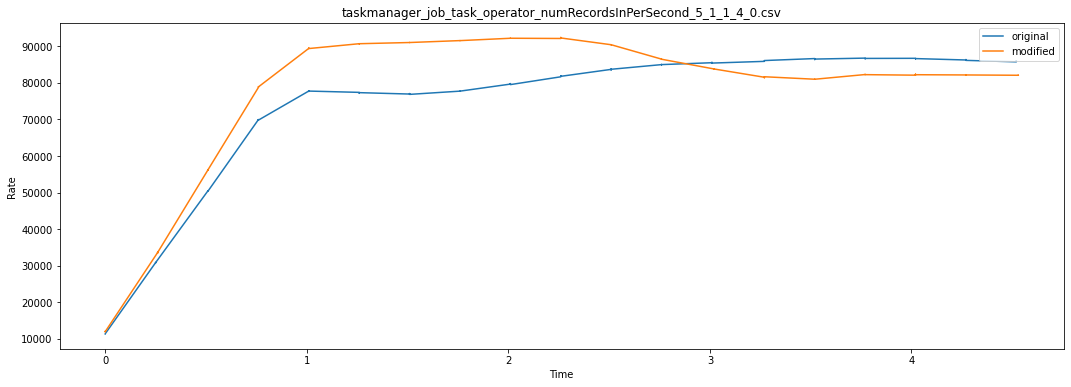

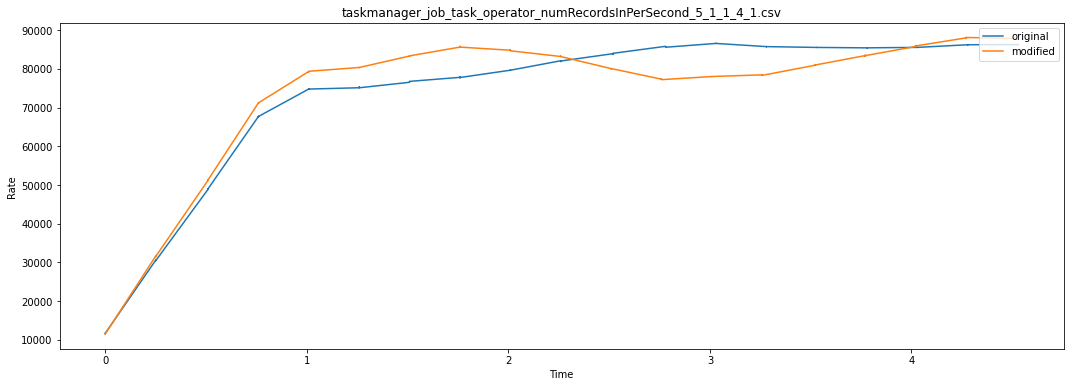

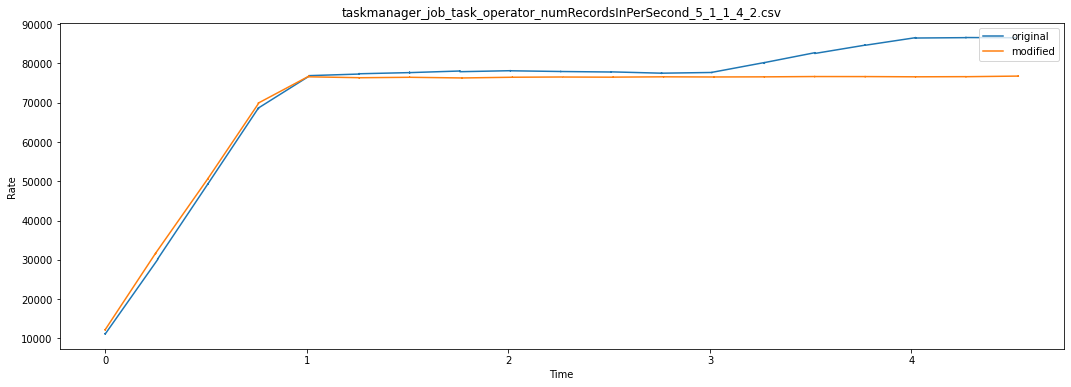

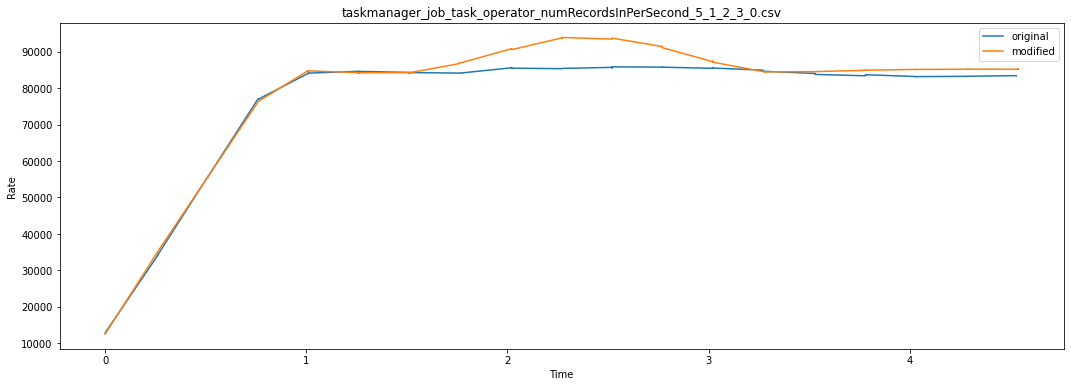

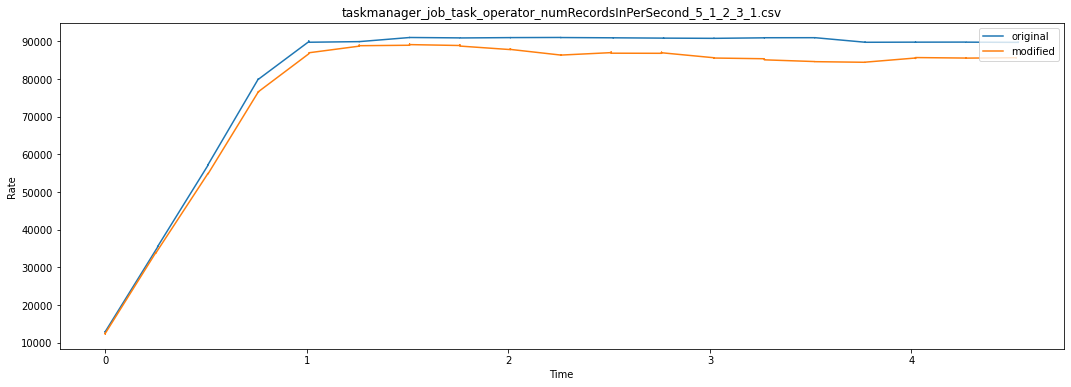

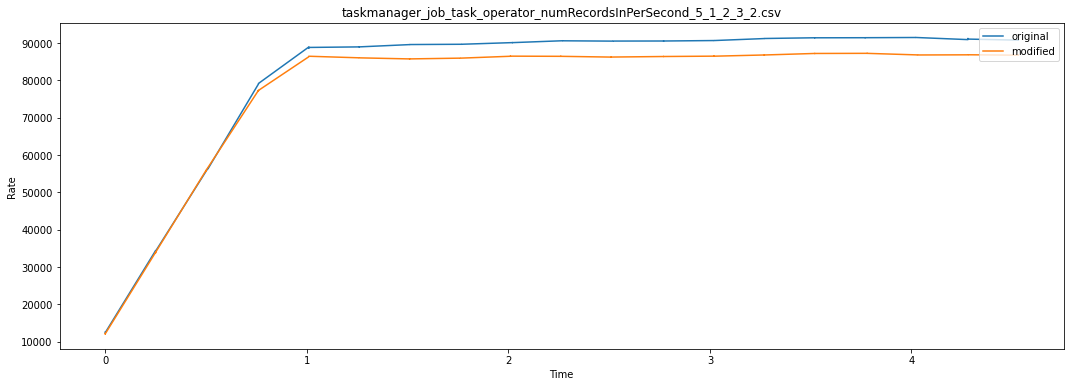

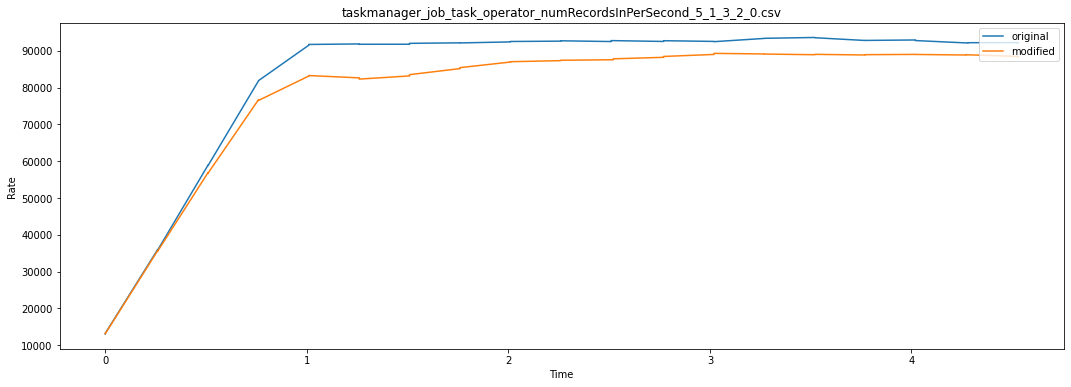

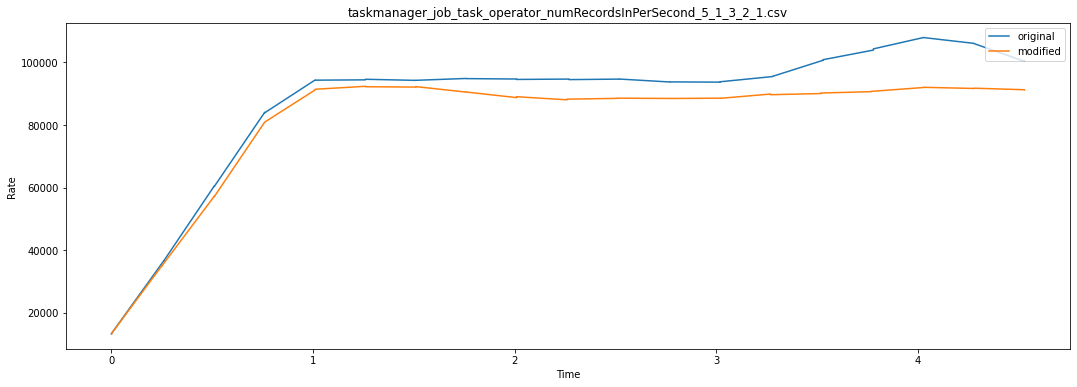

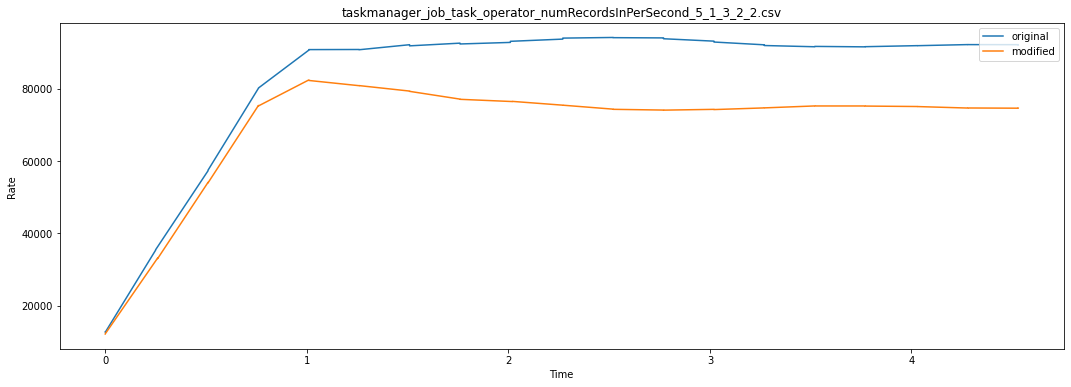

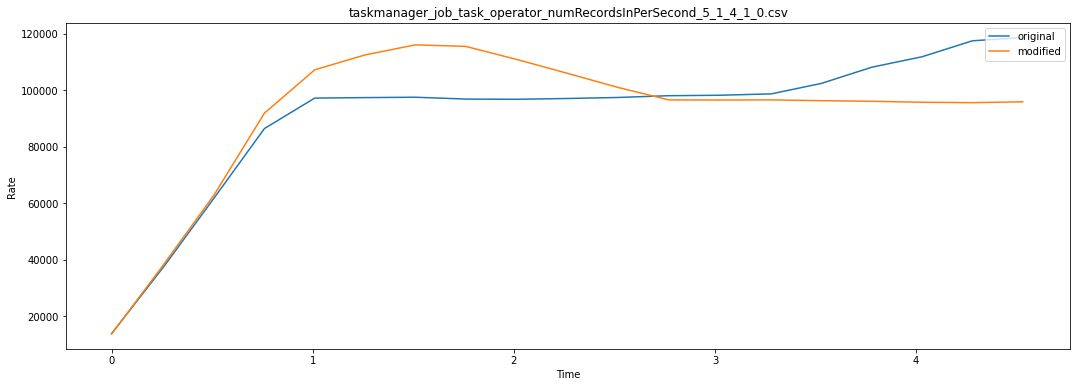

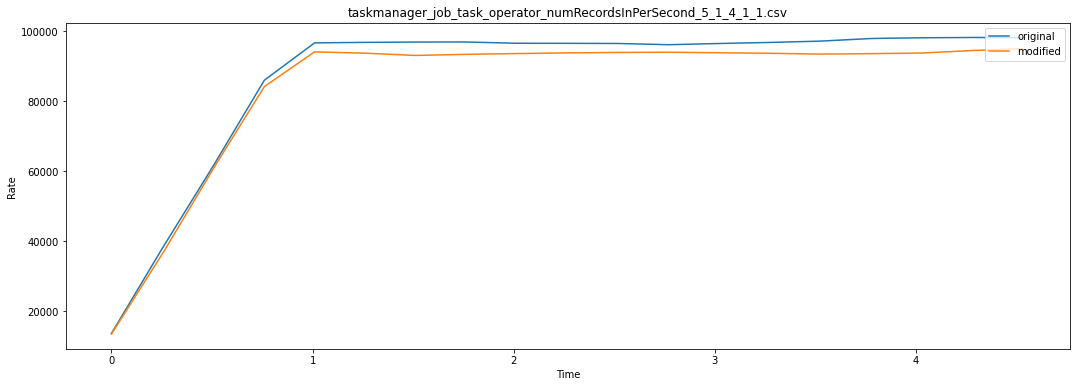

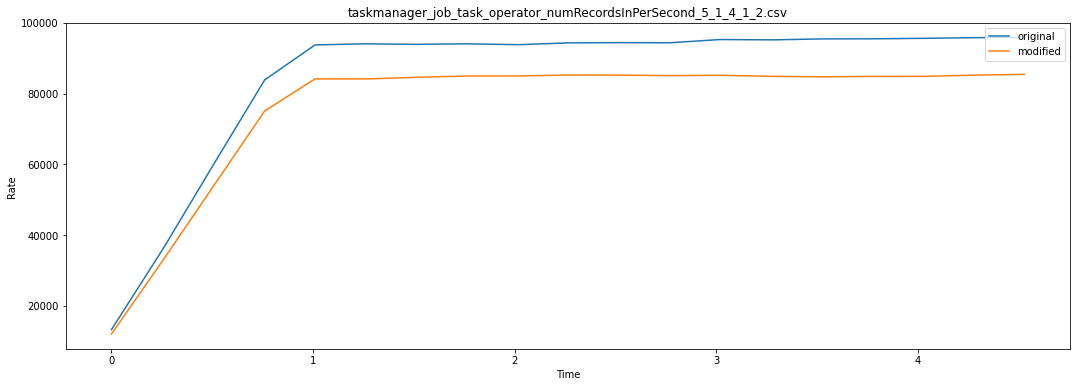

In [5]:
parallelism_params = [(1, 1, 4), (1, 2, 3), (1, 3, 2), (1, 4, 1)]
# parallelism_params = [(1, 2, 3)]
for x, y, z in parallelism_params:
    for iteration in range(3):
        base = f"taskmanager_job_task_operator_numRecordsInPerSecond_5_{x}_{y}_{z}_{iteration}.csv"
        original_path = f"./results/original_{base}"
        modified_path = f"./results/modified_{base}"
        compare_numRecordsInPerSecond(original_path, modified_path)

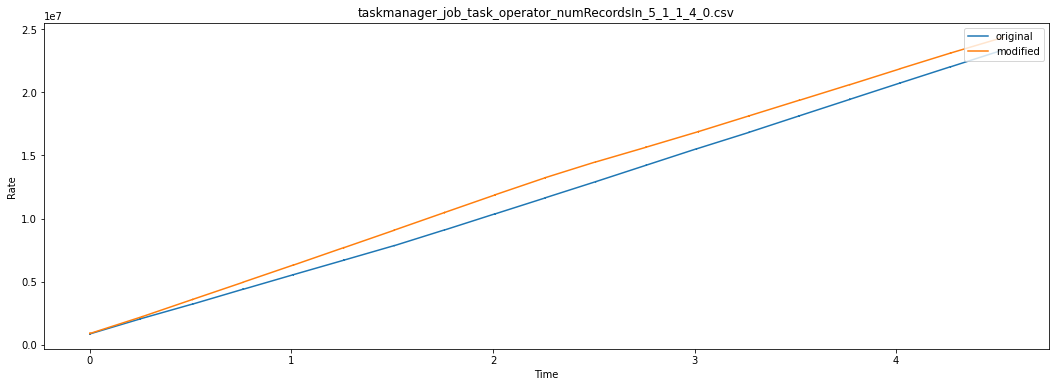

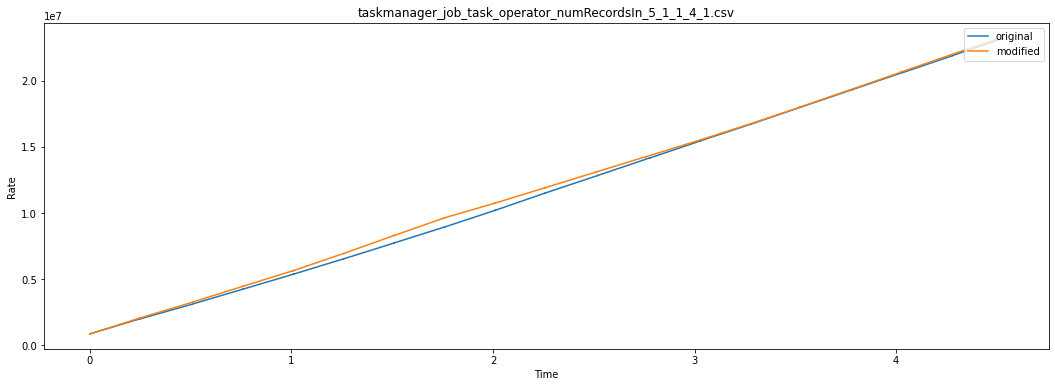

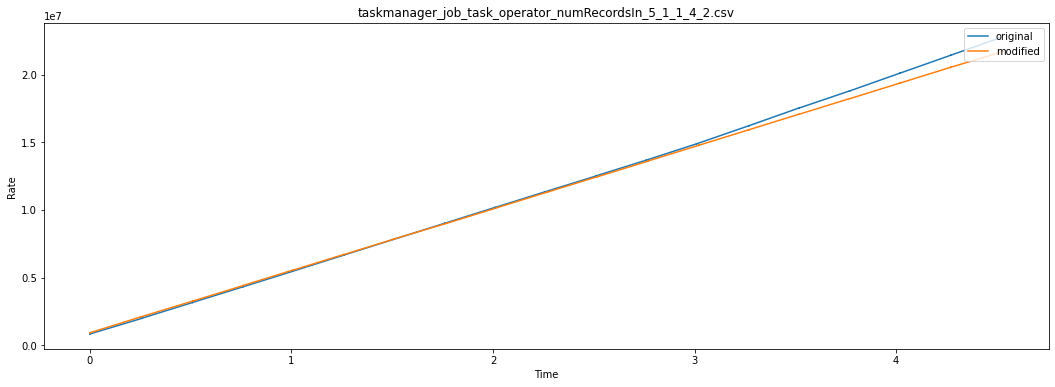

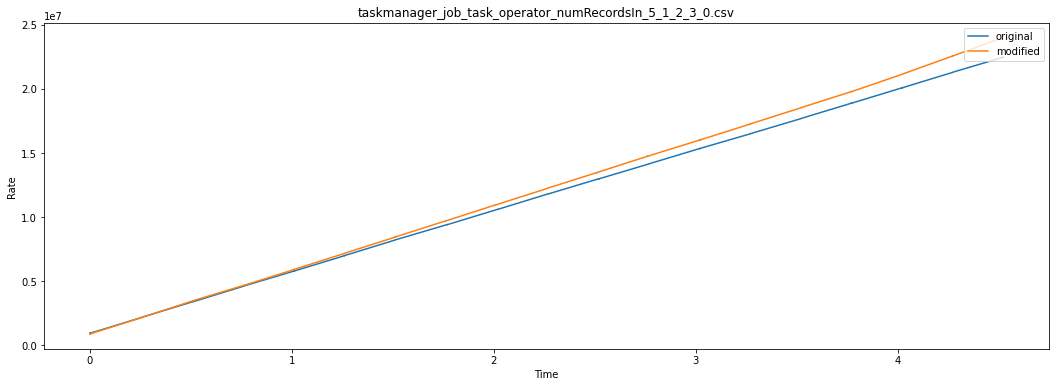

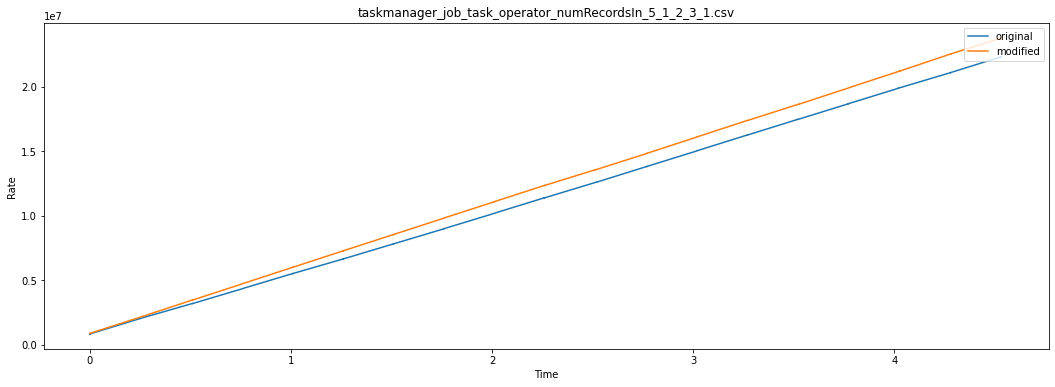

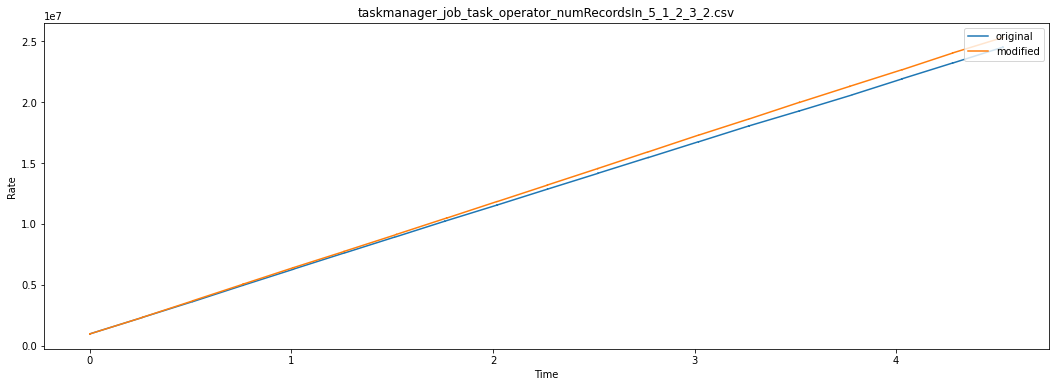

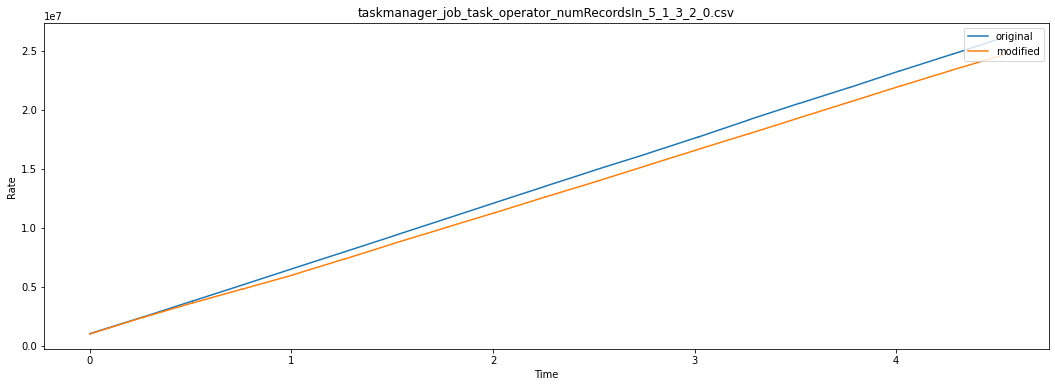

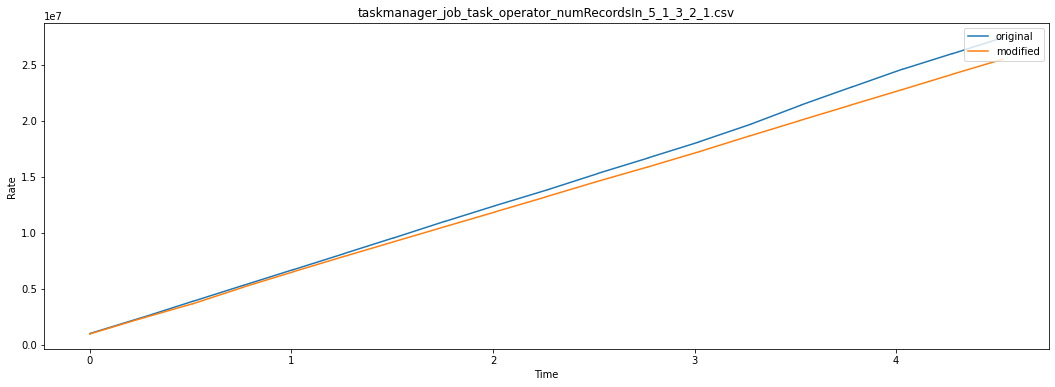

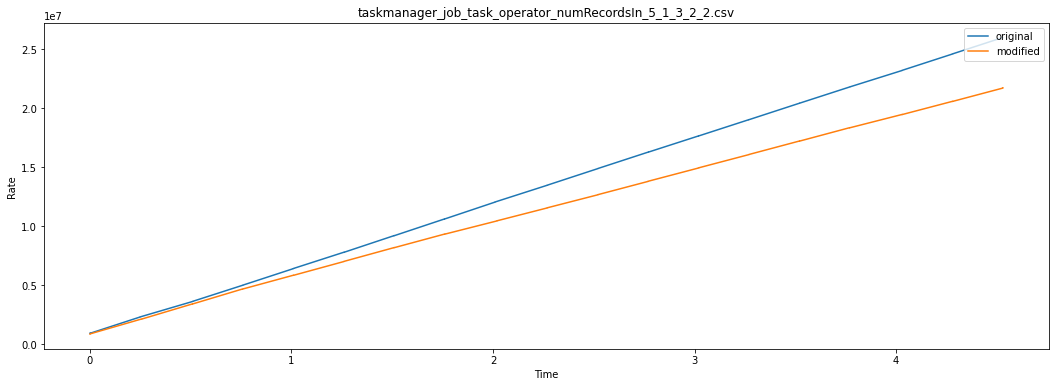

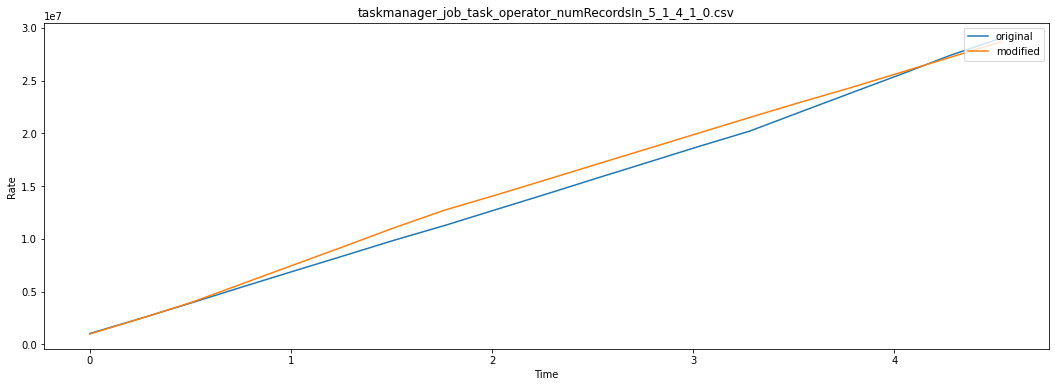

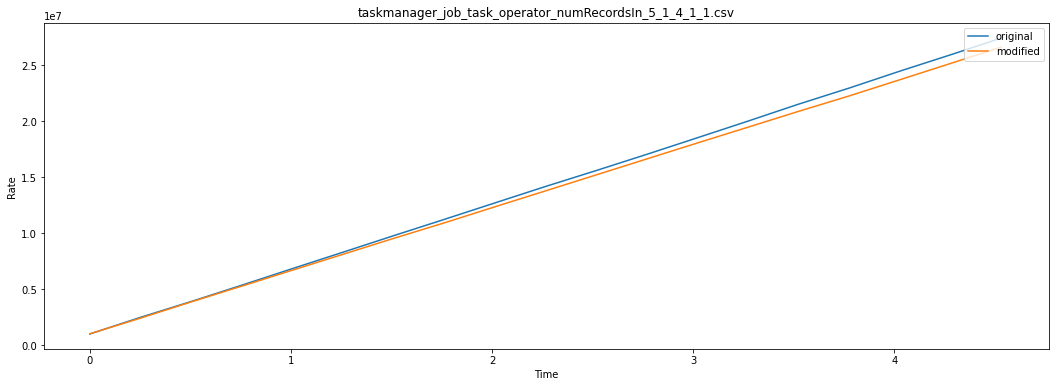

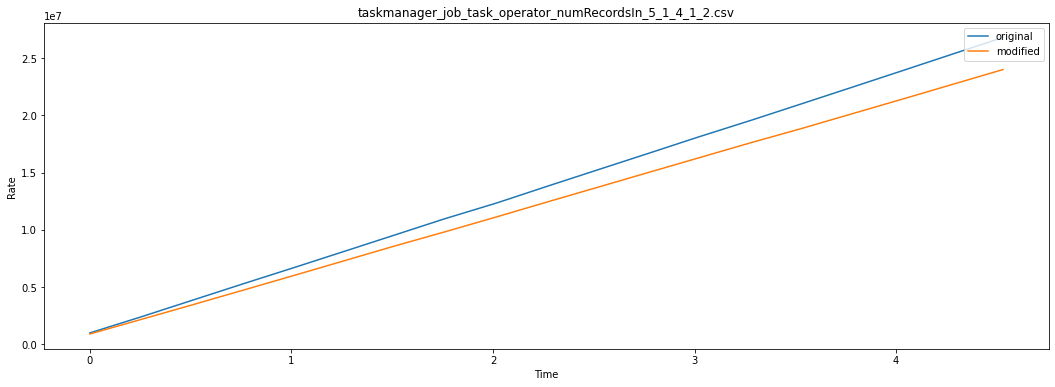

In [41]:
parallelism_params = [(1, 1, 4), (1, 2, 3), (1, 3, 2), (1, 4, 1)]
for x, y, z in parallelism_params:
    for iteration in range(3):
        base = f"taskmanager_job_task_operator_numRecordsIn_5_{x}_{y}_{z}_{iteration}.csv"
        original_path = f"./results/original_{base}"
        modified_path = f"./results/modified_{base}"
        compare_numRecordsIn(original_path, modified_path)

In [3]:
def compare_numRecordsInPerSecond(original_path: str, modified_path: str) -> None:
    df_o = pd.read_csv(original_path, header=0)
    df_m = pd.read_csv(modified_path, header=0)
    sink_df_o = df_o.loc[df_o['operator_name'] == "Sink: count-sink"]
    sink_df_m = df_m.loc[df_m['operator_name'] == "Sink: count-sink"]
    
    start_time_o = pd.to_datetime(sink_df_o.iloc[0]['time'], unit='ns', utc=True)
    sink_df_o['time'] = pd.to_datetime(sink_df_o['time'], unit='ns', utc=True)
    sink_df_o['rel_time'] = round((sink_df_o['time'] - start_time_o).dt.total_seconds() / 60.0, 2);

    start_time_m = pd.to_datetime(sink_df_m.iloc[0]['time'], unit='ns', utc=True);
    sink_df_m['time'] = pd.to_datetime(sink_df_m['time'], unit='ns', utc=True);
    sink_df_m['rel_time'] = round((sink_df_m['time'] - start_time_m).dt.total_seconds() / 60.0, 2);
    
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(sink_df_o["rel_time"], sink_df_o["rate"], label="original")
    ax.plot(sink_df_m["rel_time"], sink_df_m["rate"], label="modified")
    filename = original_path[19:]
    ax.set(xlabel="Time", ylabel="Rate", title=filename)
    ax.legend(loc='upper right')
    plt.savefig(f'./figures/{filename}.png')
    plt.show()
    


# original_path = "./results/original_taskmanager_job_task_operator_numRecordsInPerSecond.csv"
# modified_path = "./results/modified_taskmanager_job_task_operator_numRecordsInPerSecond.csv"
# compare_numRecordsInPerSecond(original_path, modified_path)


In [38]:
def compare_numRecordsIn(original_path: str, modified_path: str) -> None:
    df_o = pd.read_csv(original_path, header=0)
    df_m = pd.read_csv(modified_path, header=0)
    sink_df_o = df_o.loc[df_o['operator_name'] == "Sink: count-sink"]
    sink_df_m = df_m.loc[df_m['operator_name'] == "Sink: count-sink"]
    
    start_time_o = pd.to_datetime(sink_df_o.iloc[0]['time'], unit='ns', utc=True)
    sink_df_o['time'] = pd.to_datetime(sink_df_o['time'], unit='ns', utc=True)
    sink_df_o['rel_time'] = round((sink_df_o['time'] - start_time_o).dt.total_seconds() / 60.0, 2);

    start_time_m = pd.to_datetime(sink_df_m.iloc[0]['time'], unit='ns', utc=True);
    sink_df_m['time'] = pd.to_datetime(sink_df_m['time'], unit='ns', utc=True);
    sink_df_m['rel_time'] = round((sink_df_m['time'] - start_time_m).dt.total_seconds() / 60.0, 2);
    
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(sink_df_o["rel_time"], sink_df_o["count"], label="original")
    ax.plot(sink_df_m["rel_time"], sink_df_m["count"], label="modified")
    filename = original_path[19:]
    ax.set(xlabel="Time", ylabel="Rate", title=filename)
    ax.legend(loc='upper right')
    plt.savefig(f'./figures/{filename}.png')
    plt.show()
    
# original_path = "./results/original_taskmanager_job_task_operator_numRecordsIn.csv"
# modified_path = "./results/modified_taskmanager_job_task_operator_numRecordsIn.csv"
# compare_numRecordsIn(original_path, modified_path)